## Install Dependencies

In [1]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Packages

In [6]:
import requests
from pyexcel_ods import get_data
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine
import os
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt



## Load Data

In [7]:
import requests
from pyexcel_ods import get_data
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine
import os
from io import StringIO
import os
import pandas as pd
from sqlalchemy import create_engine

notebook_directory = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
db_relative_path = os.path.join("..", "data", "Linda_data.db")
db_absolute_path = os.path.abspath(os.path.join(notebook_directory, db_relative_path))
engine = create_engine(f'sqlite:///{db_absolute_path}')

try:
    #df_startup_data = pd.read_sql_table('startup_data', con=engine)
    df_combined_gdp = pd.read_sql_table('germany_combined_gdp', con=engine)
    df_startup_business = pd.read_sql_table('startup_data_business', con=engine)
    df_employment_growth = pd.read_sql_table('employment_growth_data', con=engine)
    df_venture_capital_data = pd.read_sql_table('venture_capital_data', con=engine)
    print("Data loaded successfully!")

except Exception as e:
    print(f"Error: {str(e)}")

finally:
    engine.dispose()


Data loaded successfully!


#### Data exploration- Data source 1


In [8]:
df_combined_gdp.head()

,Year,GDP Growth Rate,GDP per Capita (Current US Dollars)
0,1971,3.132700,2.499851e+11
1,1972,4.300341,2.998015e+11
2,1973,4.777487,3.983740e+11
3,1974,0.890069,4.453035e+11
4,1975,-0.866739,4.906365e+11


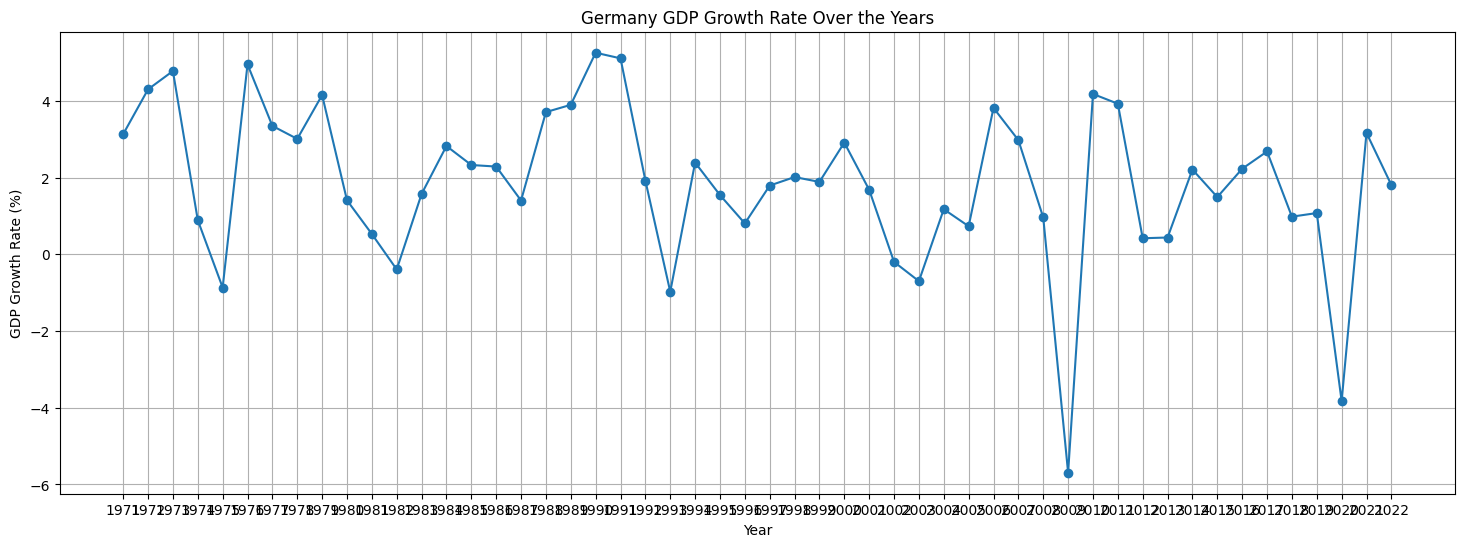

In [9]:
plt.figure(figsize=(18, 6))
plt.plot(df_combined_gdp['Year'], df_combined_gdp['GDP Growth Rate'], marker='o')
plt.title('Germany GDP Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.show()

#### Data exploration- Data source 2

In [10]:
df_startup_business.head()

,Year,Business Startups
0,2003,"164,885"
1,2004,"175,964"
2,2005,"170,827"
3,2006,"162,008"
4,2007,"153,607"


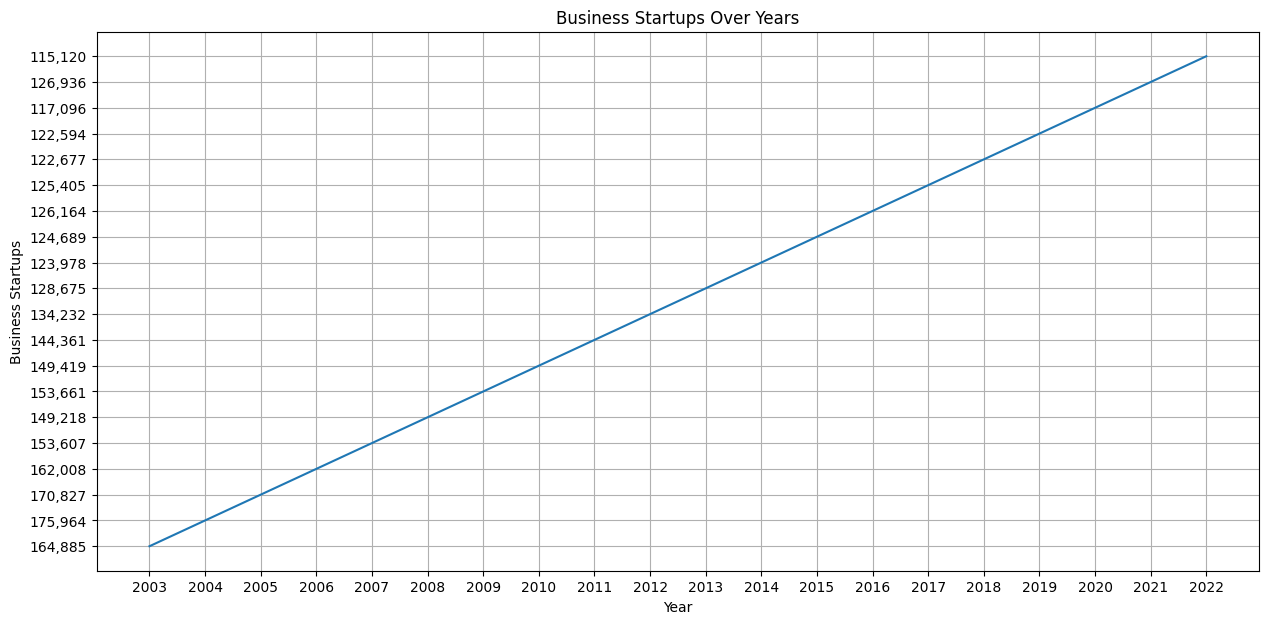

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(df_startup_business['Year'], df_startup_business['Business Startups'])
plt.title('Business Startups Over Years')
plt.xlabel('Year')
plt.ylabel('Business Startups')
plt.grid(True)
years = df_startup_business['Year'].astype(int)
plt.xticks(years)
plt.show()

#### Data exploration- Data source 3

In [12]:
df_employment_growth.head()

,Year,Total,"Agriculture, Forestry, and Fishing",Manufacturing Industry excl. Construction,Construction,Service Industries
0,1992,"-1,3","-11,7","-7,4","3,9","1,4"
1,1993,"-1,3","-7,6","-6,7","3,8","0,6"
2,1994,0,-4,"-4,9","4,5","1,6"
3,1995,"0,4",-6,"-2,3",2,"1,4"
4,1996,0,"-6,5","-2,5",-3,"1,6"


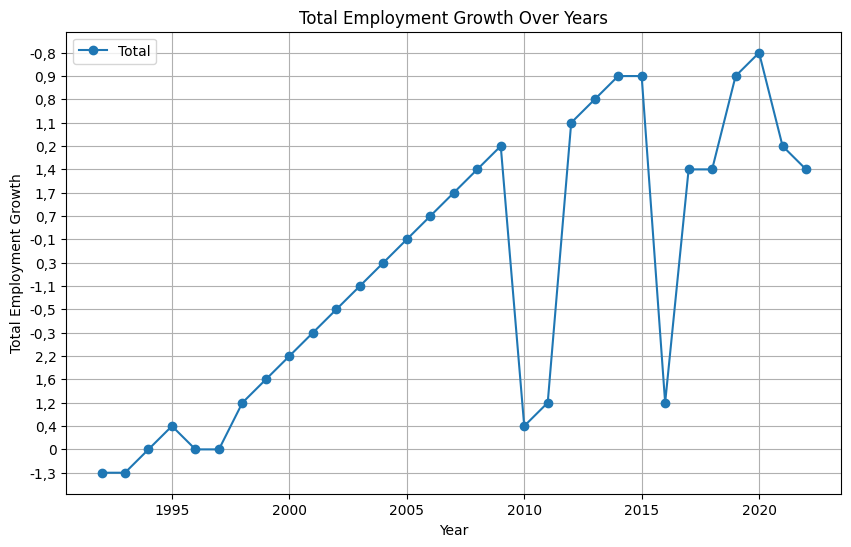

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df_employment_growth['Year'], df_employment_growth['Total'], marker='o', linestyle='-', label='Total')
plt.title('Total Employment Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Total Employment Growth')
plt.legend()
plt.grid(True)
plt.show()


#### Data exploration- Data source 4

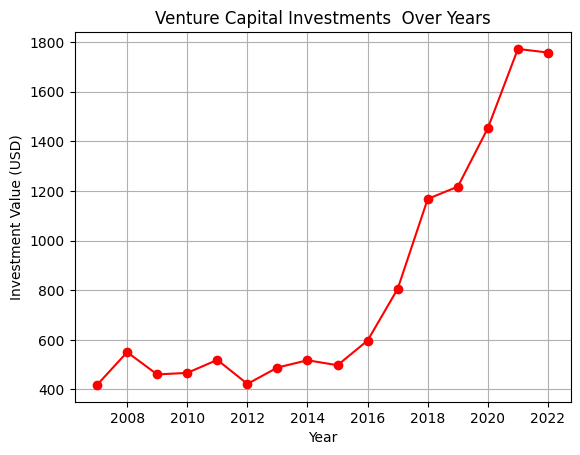

In [14]:
df_venture_capital_data.head()
import matplotlib.pyplot as plt
import pandas as pd
df_filtered_venture_cap = df_venture_capital_data[(df_venture_capital_data['STAGES'] == 'START') & (df_venture_capital_data['MEASURE'] == 'USD_V')].copy()
df_filtered_venture_cap.loc[:, 'Year'] = pd.to_numeric(df_filtered_venture_cap['Time'])
df_filtered_venture_cap.loc[:, 'Value'] = pd.to_numeric(df_filtered_venture_cap['Value'])
df_filtered_venture_cap = df_filtered_venture_cap[df_filtered_venture_cap['Value'] != 0]
plt.plot(df_filtered_venture_cap['Year'], df_filtered_venture_cap['Value'], marker='o', linestyle='-', color='r')
plt.title('Venture Capital Investments  Over Years')
plt.xlabel('Year')
plt.ylabel('Investment Value (USD)')
plt.grid(True)
plt.show()


In [15]:
print(df_combined_gdp.shape, df_employment_growth.shape, df_startup_business.shape, df_filtered_venture_cap.shape)
print(df_combined_gdp.columns, df_employment_growth.columns, df_startup_business.columns,df_filtered_venture_cap.columns)

(52, 3) (31, 6) (20, 2) (16, 10)
Index(['Year', 'GDP Growth Rate', 'GDP per Capita (Current US Dollars)'], dtype='object') Index(['Year', 'Total', 'Agriculture, Forestry, and Fishing',
       'Manufacturing Industry excl. Construction', 'Construction',
       'Service Industries'],
      dtype='object') Index(['Year', 'Business Startups'], dtype='object') Index(['Time', 'Value', 'LOCATION', 'SUBJECT', 'STAGES', 'MEASURE',
       'TIME_FORMAT', 'UNIT', 'POWERCODE', 'Year'],
      dtype='object')


c:\Users\lynda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\lynda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


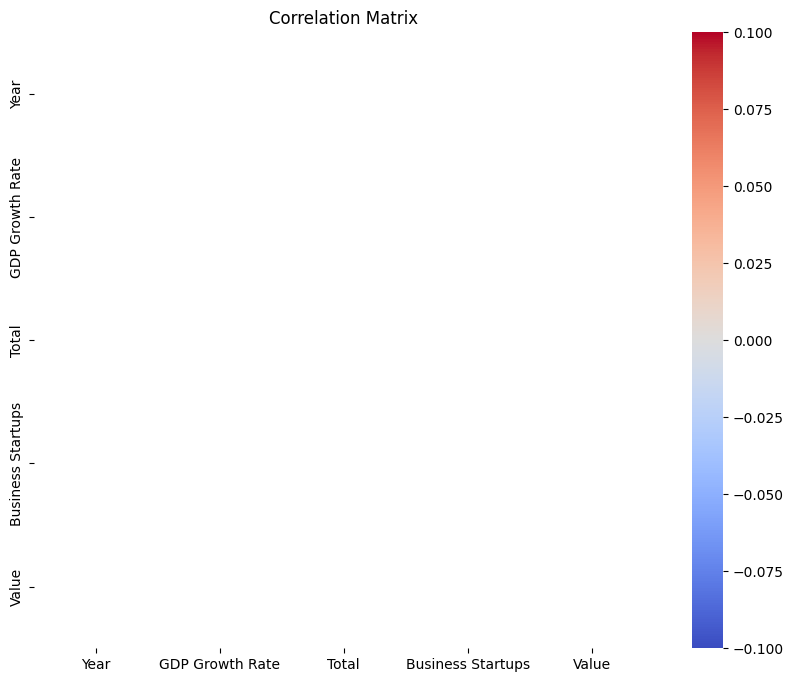

In [16]:
common_index = 'Year'
selected_columns_gdp = ['Year', 'GDP Growth Rate']
selected_columns_employment_growth = ['Year', 'Total']
selected_columns_startup_business = ['Year', 'Business Startups']
selected_columns_venture_capital = ['Year', 'Value']
df_combined_gdp = df_combined_gdp[selected_columns_gdp].set_index(common_index)
df_employment_growth = df_employment_growth[selected_columns_employment_growth].set_index(common_index)
df_startup_business = df_startup_business[selected_columns_startup_business].set_index(common_index)
df_filtered_venture_cap =df_filtered_venture_cap[selected_columns_venture_capital].set_index(common_index)
df_combined = pd.concat([df_combined_gdp, df_employment_growth, df_startup_business,df_filtered_venture_cap], axis=1)
df_combined = df_combined.reset_index()
df_combined = df_combined.dropna()
numeric_columns = df_combined.columns
df_combined[numeric_columns] = df_combined[numeric_columns].replace({',': ''}, regex=True)
df_combined[numeric_columns] = df_combined[numeric_columns].astype(float)
df_combined = df_combined.fillna(0)
correlation_matrix = df_combined.corr()
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [17]:
import numpy as np
correlation_values = correlation_matrix.values
correlation_labels = correlation_matrix.columns
flat_correlation = correlation_values[np.triu_indices_from(correlation_values, k=1)]
flat_labels = [(correlation_labels[i], correlation_labels[j]) for i, j in zip(*np.triu_indices_from(correlation_values, k=1))]
correlation_df = pd.DataFrame({'Correlation': flat_correlation}, index=pd.MultiIndex.from_tuples(flat_labels, names=('Variable 1', 'Variable 2')))
sorted_correlations = correlation_df.sort_values(by='Correlation', ascending=False)
print("Top 10 positive correlations:")
print(sorted_correlations.head(10))
print("\nTop 10 negative correlations:")
print(sorted_correlations.tail(10))


Top 10 positive correlations:
                                     Correlation
Variable 1        Variable 2                    
Year              GDP Growth Rate            NaN
                  Total                      NaN
                  Business Startups          NaN
                  Value                      NaN
GDP Growth Rate   Total                      NaN
                  Business Startups          NaN
                  Value                      NaN
Total             Business Startups          NaN
                  Value                      NaN
Business Startups Value                      NaN

Top 10 negative correlations:
                                     Correlation
Variable 1        Variable 2                    
Year              GDP Growth Rate            NaN
                  Total                      NaN
                  Business Startups          NaN
                  Value                      NaN
GDP Growth Rate   Total                      NaN
        

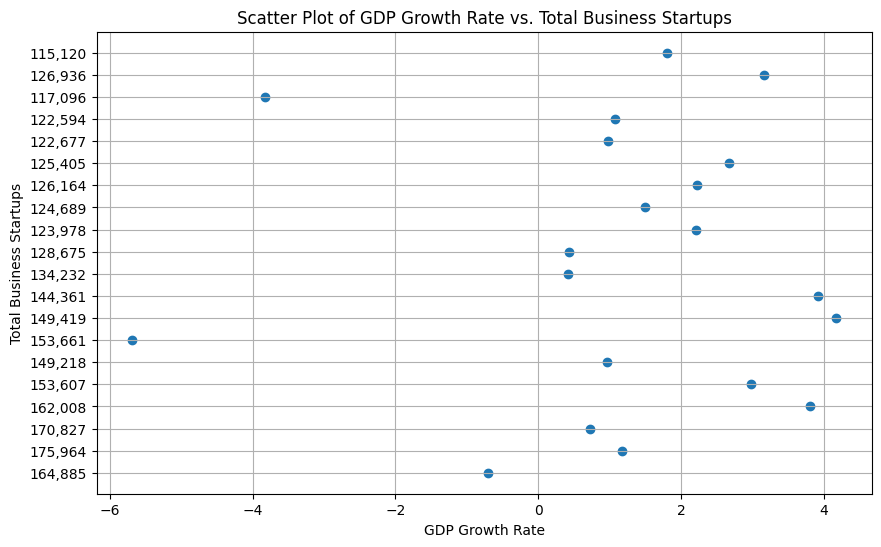

In [18]:
try:

    df_combined_gdp = pd.read_sql('SELECT * FROM germany_combined_gdp', con=engine)
    df_startup_business = pd.read_sql('SELECT * FROM startup_data_business', con=engine)
    df_combined_gdp['Year'] = df_combined_gdp['Year'].astype(int)
    df_startup_business['Year'] = df_startup_business['Year'].astype(int)
    merged_df = pd.merge(df_combined_gdp, df_startup_business, on='Year', how='inner')
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['GDP Growth Rate'], merged_df['Business Startups'])
    plt.title('Scatter Plot of GDP Growth Rate vs. Total Business Startups')
    plt.xlabel('GDP Growth Rate')
    plt.ylabel('Total Business Startups')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error: {str(e)}")

finally:
    engine.dispose()